In [1]:
import numpy as np

In [2]:
A = np.array([[1, 2, 3, 4], 
              [5, 6, 7, 8], 
              [9, 10, 11, 12], 
              [13, 14, 15, 16]])
U, S, Vt = np.linalg.svd(A)
print("Matrix A:\n", A)
print("\nU Matrix:\n", U)
print("\nSingular Values:\n", S)
print("\nV^T Matrix:\n", Vt)

Matrix A:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

U Matrix:
 [[-0.13472212 -0.82574206  0.54432436  0.06091792]
 [-0.3407577  -0.4288172  -0.77117135  0.32449153]
 [-0.54679327 -0.03189234 -0.09063038 -0.83173682]
 [-0.75282884  0.36503251  0.31747737  0.44632737]]

Singular Values:
 [3.86226568e+01 2.07132307e+00 1.52856047e-15 2.72860272e-16]

V^T Matrix:
 [[-0.4284124  -0.47437252 -0.52033264 -0.56629275]
 [ 0.71865348  0.27380781 -0.17103786 -0.61588352]
 [-0.15245872 -0.18883588  0.83504791 -0.49375331]
 [ 0.52607636 -0.81507117  0.05191325  0.23708156]]


In [3]:
def reconstract_matrix(U,S,Vt):
    return np.dot(U, np.dot(np.diag(S), Vt))
recon_A = reconstract_matrix(U,S,Vt)
print(recon_A)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]
 [13. 14. 15. 16.]]


In [4]:
reconstract_error = np.linalg.norm(A - recon_A,2)
print(reconstract_error)

1.0821996385275096e-14


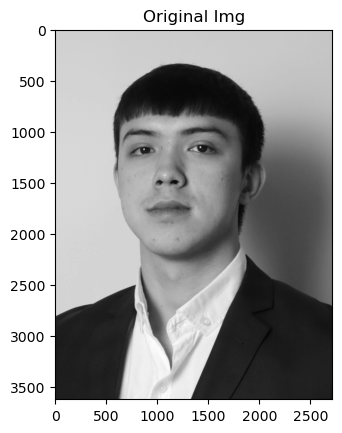

Image original size: 9843691 pixels


In [5]:
import matplotlib.pyplot as plt
from skimage import io

image = io.imread('my_face.JPG', as_gray=True)

plt.imshow(image, cmap='gray')
plt.title('Original Img')
plt.show()
print(f'Image original size: {np.prod(image.shape)} pixels')

In [25]:
# U, S, Vt = np.linalg.svd(image)

# def reconstract_image(U, S, Vt, k):
#     return np.dot(U[:,:k], np.dot(np.diag(S[:k]), Vt[:k]))
# recon_img = reconstract_image(U, S, Vt, 50)

# plt.imshow(recon_img, cmap='gray')
# plt.title('Original Img')
# plt.show()
# print(f'Image original size: {np.prod(recon_img.shape)} pixels')

In [27]:
# ks = [10,20,40,100]

# for k in ks:
#     recon_img = reconstract_image(U, S, Vt, k)
#     plt.imshow(recon_img, cmap='gray')
#     plt.title(f'Compressed Image (k={k})')
#     plt.show()

# original_size = U.size + S.size + Vt.size
# compressed_size_k = lambda k: U[:, :k].size + S[:k].size + Vt[:k, :].size
# for k in ks:
#     print(f'Original size: {original_size}, After compressing k{k}: {compressed_size_k(k)}' )

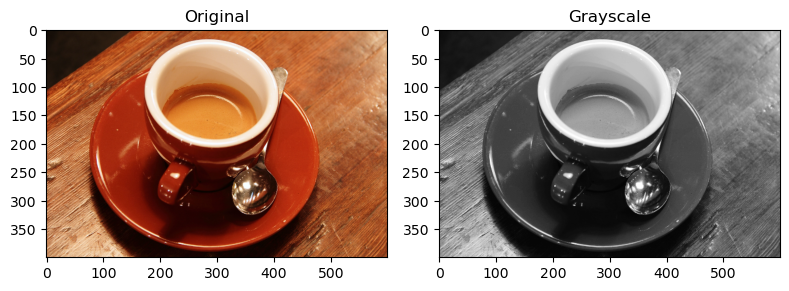

In [8]:
# Import useful modules
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2gray
from skimage import data
images = (
'astronaut',
'binary_blobs',
'brick',
'colorwheel',
'camera',
'cat',
'checkerboard',
'clock',
'coffee',
'coins',
'eagle',
'grass',
'gravel',
'horse',
'logo',
'page',
'text',
'rocket',
)
# We select the "coffee" image
caller = getattr(data, 'coffee')
original = caller()
# Then we convert it in grayscale
grayscale = rgb2gray(original)
# Plot
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()
ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")
fig.tight_layout()
plt.show()
A = np.matrix(grayscale)

In [29]:
U, S, Vt = np.linalg.svd(A)

print(f"U: {U}\n")
print(f"S: {S}\n")
print(f"Vt: {Vt}")

U: [[-0.04852397  0.0312135  -0.03493883 ...  0.1960751  -0.08519447
   0.04608563]
 [-0.04881733  0.03119333 -0.03354562 ... -0.22466376  0.1855161
  -0.11778719]
 [-0.04883068  0.03110957 -0.03285646 ...  0.06458557 -0.26237949
   0.26986574]
 ...
 [-0.036614   -0.09697348  0.0136033  ...  0.01091766  0.00318246
   0.01836452]
 [-0.03704717 -0.09606778  0.01256875 ... -0.00208876 -0.00135068
  -0.01122996]
 [-0.03739183 -0.0968259   0.01197249 ...  0.00085663  0.00190269
  -0.00360776]]

S: [1.98847252e+02 6.60736188e+01 3.39937413e+01 2.64756296e+01
 2.08741352e+01 1.81788093e+01 1.55034241e+01 1.38967552e+01
 1.23101893e+01 1.18814048e+01 1.03164753e+01 9.83313929e+00
 8.99755690e+00 8.05602055e+00 7.31635064e+00 6.95819226e+00
 6.75491336e+00 6.42216740e+00 6.18134797e+00 5.69657148e+00
 5.49083227e+00 5.17494901e+00 5.12519723e+00 4.95955855e+00
 4.82825677e+00 4.81647845e+00 4.57119022e+00 4.53008816e+00
 4.33991241e+00 4.28853748e+00 4.05366032e+00 3.96748014e+00
 3.83864883e+0

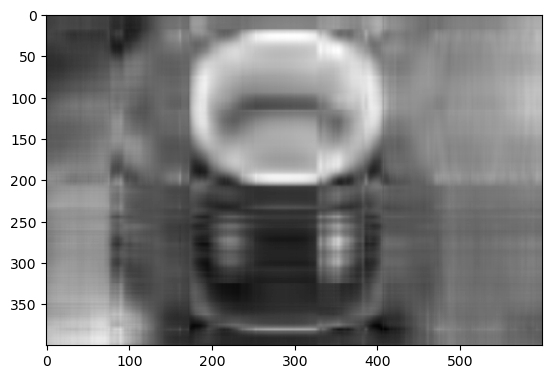

In [69]:
def recon(U,S,Vt,k):
    return np.dot(U[:,:k], np.dot(np.diag(S[:k]), Vt[:k]))

recon_image = recon(U, S, Vt, 5)
plt.imshow(recon_image, cmap='gray')
plt.show()

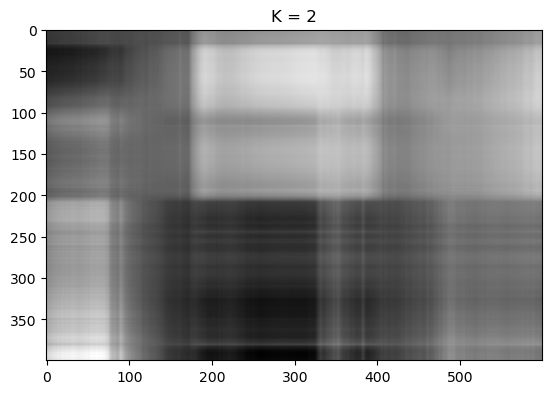

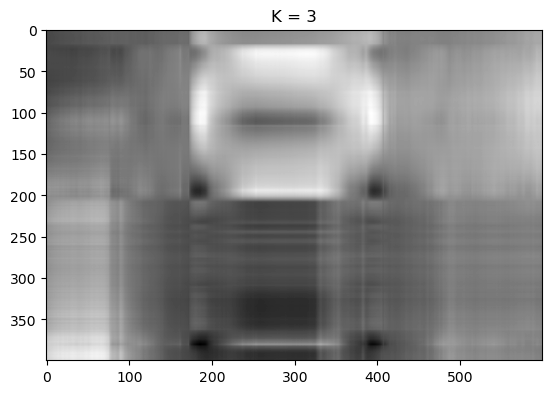

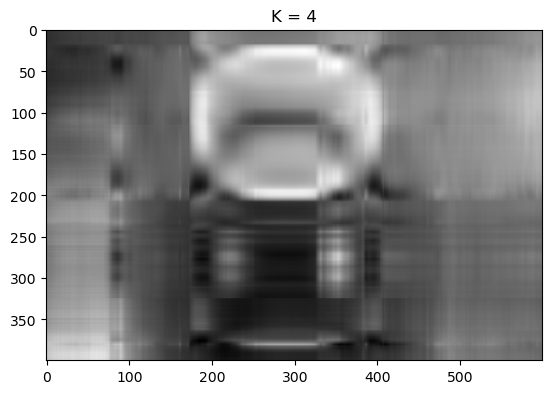

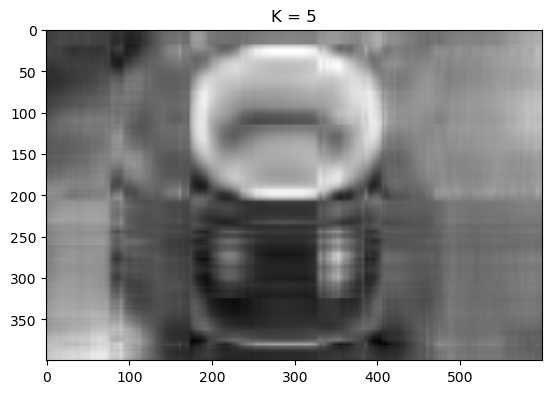

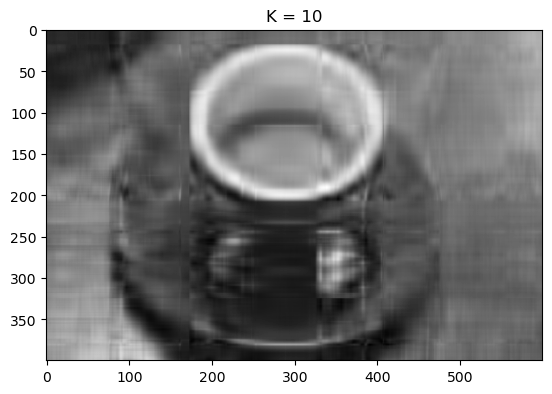

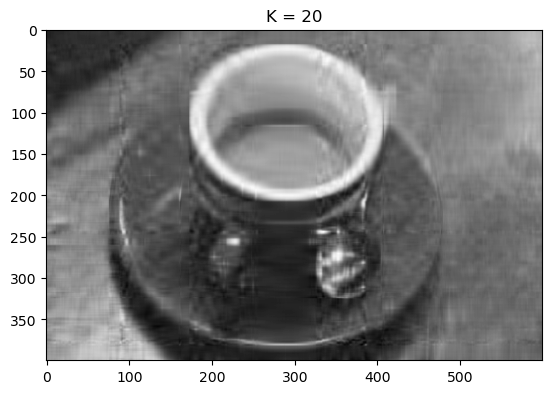

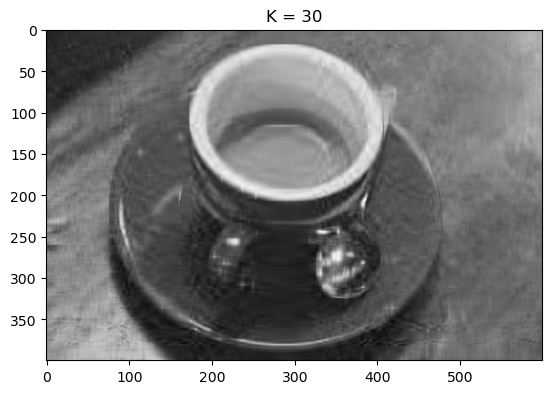

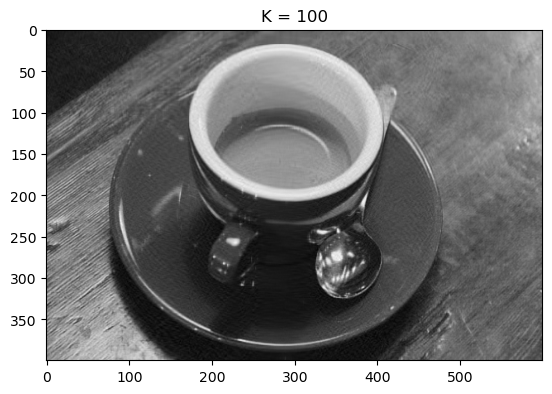

Original size: 720000, After compression k=2: 2002
Original size: 720000, After compression k=3: 3003
Original size: 720000, After compression k=4: 4004
Original size: 720000, After compression k=5: 5005
Original size: 720000, After compression k=10: 10010
Original size: 720000, After compression k=20: 20020
Original size: 720000, After compression k=30: 30030
Original size: 720000, After compression k=100: 100100


In [71]:
kb = [2,3,4,5,10,20,30,100]

for k in kb:
    recon_image = recon(U, S, Vt,k)
    plt.imshow(recon_image, cmap='gray')
    plt.title(f'K = {k}')
    plt.show()

original_size = np.prod(original.shape)
after_compression = lambda k: U[:,:k].size + S[:k].size + Vt[:k].size 
for k in kb:
    print(f'Original size: {original_size}, After compression k={k}: {after_compression(k)}')

In [93]:
error_after_recon = np.linalg.norm(A - recon(U, S, Vt,100), 2)
print(error_after_recon)

1.8223554617721482


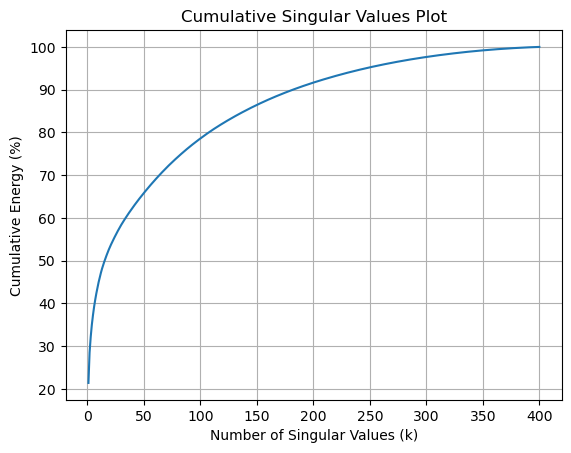

In [113]:
cummulative_sing_val = np.cumsum(S)
total_energy = cummulative_sing_val[-1]

plt.plot(np.arange(1, len(S) + 1), cummulative_sing_val / total_energy * 100)
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Cumulative Energy (%)')
plt.title('Cumulative Singular Values Plot')
plt.grid(True)
plt.show()